# Graph Data Analysis Homework #1

1. Select your own graph data
2. Upload the data to your own public github repo, and make it downloadable.
3. Using NetworkX or your own data structure, read the data.
4. Using NetworkX or your own data structure, get statistics (Number of nodes, Number of edges, Average of degrees, Std of degrees, and others if you can find any)
5. Using NetworkX or your favorite tools, draw your graph.
6. Using NetworkX or your own data structure, doing BFS. (Showing the algorithm is working properly by at least 20 nodes traversal.)
7. Using NetworkX or your own data structure, doing DFS.(Showing the algorithm is working properly by at least 20 nodes traversal.)
8. Using NetworkX or your own data structure, finding a shortest path using dijkstra algorithm.

## 1. Selecting your own graph Data
* Finding your own graph data
  * Possible sources: https://www.kaggle.com/, https://huggingface.co/datasets, and others! But please check the data could be used in educational purpose.
  * Please find it yourself, if there are conflicts between yourselves, I will suggest you to change it to others.
  * If the dataset is too large, you can sample the data, it is up to you but I suggest you to have less than 25MB file for now because of the following reason.

## 2. Uplaod the data to your own public github repo and make it downloadable.

> Caution: Files that you add to a repository via a browser are limited to 25 MiB per file. You can add larger files, up to 100 MiB each, via the command line. For more information, see Adding a file to a repository using the command line. To add files larger than 100 MiB, you must use Git Large File Storage. For more information, see About large files on GitHub. [ref](https://docs.github.com/en/repositories/working-with-files/managing-files/adding-a-file-to-a-repository)

In [ ]:
import pandas as pd

data_url="https://raw.githubusercontent.com/qda-sw/graph-data-analysis-2025-fall/refs/heads/main/hw01/netflix_titles.csv"

data = pd.read_csv(data_url)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## 3. Using NetworkX or your own data structure, read the data.


In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
G = nx.DiGraph()

for index, row in data.iterrows():
    video_type = row['type']
    title = row['title']
    director = row['director']
    cast = row['cast']
    country = row['country']
    date_added = row['date_added']
    release_year = row['release_year']
    rating = row['rating']
    duration = row['duration']
    listed_in = row['listed_in']
    description = row['description']

    G.add_node(title, type='title', label=title)

    if pd.notna(director):
        G.add_node(director, type='director', label=director)
        G.add_edge(director, title, type='directed')

    if pd.notna(cast):
        for actor in cast.split(','):
            actor = actor.strip()
            G.add_node(actor, type='actor', label=actor)
            G.add_edge(actor, title, type='acted_in')

    if pd.notna(country):
        for c in country.split(', '):
            c = c.strip()
            G.add_node(c, type='country', label=c)
            G.add_edge(title, c, type='produced_in')

    if pd.notna(release_year):
        release_year = str(release_year)
        G.add_node(release_year, type='release_year', label=str(release_year))
        G.add_edge(title, release_year, type='released_in')
    
    if pd.notna(rating):
        G.add_node(rating, type='rating', label=rating)
        G.add_edge(title, rating, type='has_rating')
        


## 4. Using NetworkX or your own data structure, get statistics (Number of nodes, Number of edges, Average of degrees, Std of degrees, and others if you can find any)

Graph created with 49565 nodes and 97659 edges.
Average degree: 3.9406435993140323


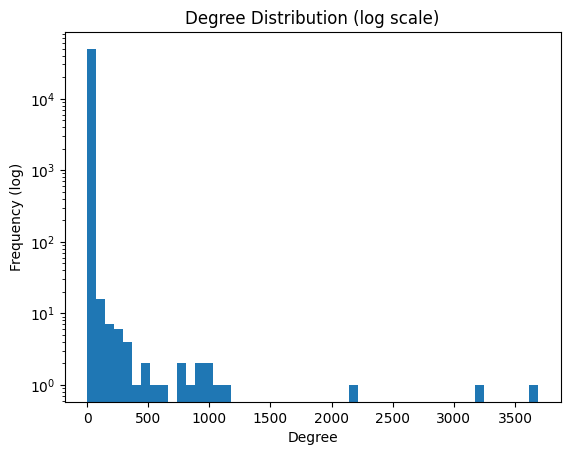

Degree std: 28.463057718118915
Min degree: 1
Max degree: 3689


In [25]:
# Change the following code into your any of statistics
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

G.number_of_nodes(), G.number_of_edges()

# avg degree
degrees = [deg for node, deg in G.degree()]
avg_degree = sum(degrees) / len(degrees)
print(f"Average degree: {avg_degree}")

# degree distribution (log scale)
plt.hist(degrees, bins=50, log=True)
plt.title("Degree Distribution (log scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (log)")
plt.show()

# std, min, max degree
import numpy as np
print(f"Degree std: {np.std(degrees)}")
print(f"Min degree: {np.min(degrees)}")
print(f"Max degree: {np.max(degrees)}")

## 5. Using NetworkX or your favorite tools, draw your graph.

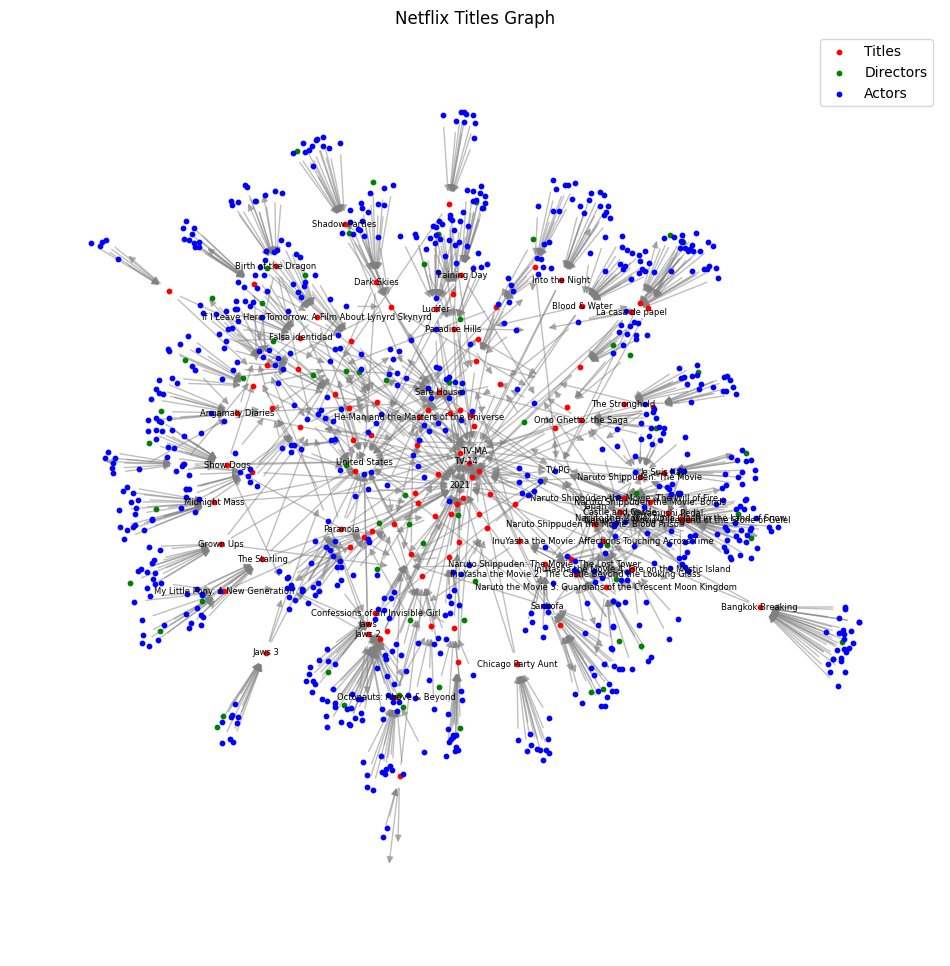

In [26]:
plt.figure(figsize=(12, 12))
H = G.subgraph(list(G.nodes)[:1000])
pos = nx.spring_layout(H)

titles = [n for n, attr in H.nodes(data=True) if attr['type'] == 'title']
directors = [n for n, attr in H.nodes(data=True) if attr['type'] == 'director']
actors = [n for n, attr in H.nodes(data=True) if attr['type'] == 'actor']

nx.draw_networkx_nodes(H, pos, nodelist=titles, node_color='red', label='Titles', node_size=10)
nx.draw_networkx_nodes(H, pos, nodelist=directors, node_color='green', label='Directors', node_size=10)
nx.draw_networkx_nodes(H, pos, nodelist=actors, node_color='blue', label='Actors', node_size=10)

nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.5, edge_color='gray')

node_labels = {n: H.nodes[n]['label'] for n in H.nodes()}
if H.number_of_nodes() > 50: # Limit labels for large graphs
      # Only label a subset, e.g., top degree nodes
      degrees = dict(H.degree())
      top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:50] # Label top 50 nodes
      node_labels = {n: node_labels[n] for n in top_nodes}


nx.draw_networkx_labels(H, pos, labels=node_labels, font_size=6)

plt.title("Netflix Titles Graph")
plt.legend()
plt.axis('off')
plt.show()



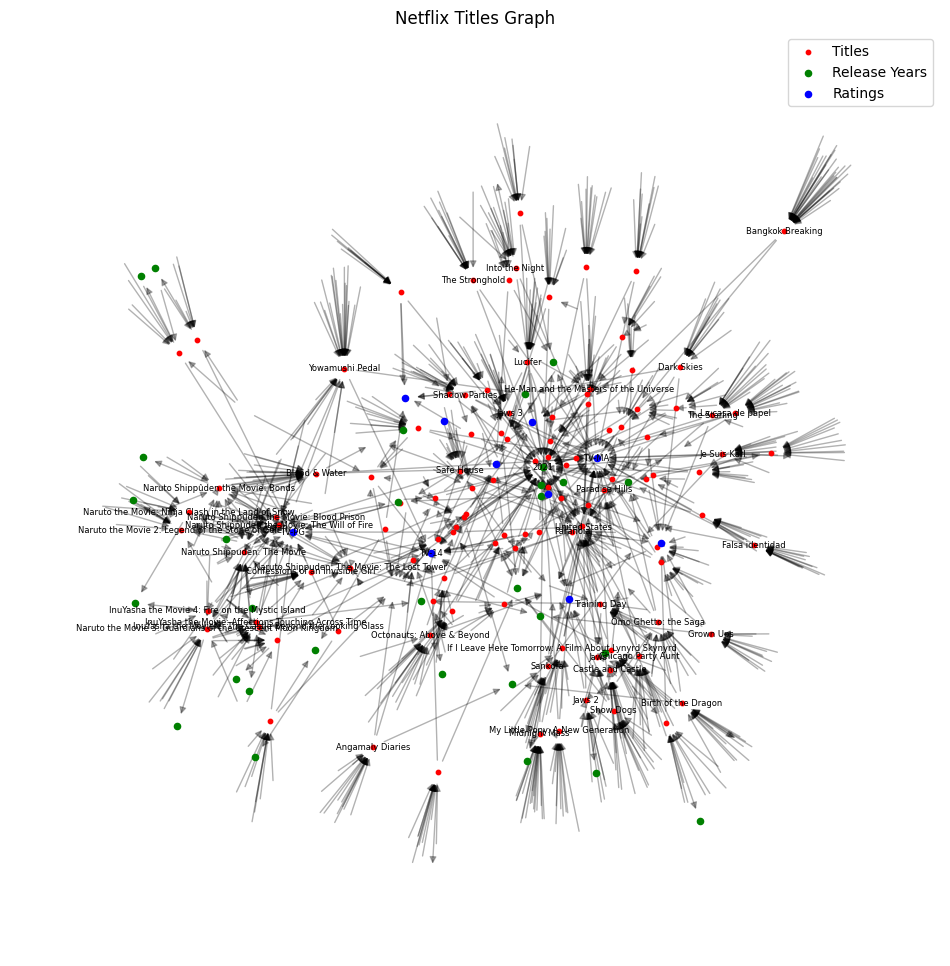

In [27]:
plt.figure(figsize=(12, 12))
H = G.subgraph(list(G.nodes)[:1000])
pos = nx.spring_layout(H)

titles = [n for n, attr in H.nodes(data=True) if attr['type'] == 'title']
release_years = [n for n, attr in H.nodes(data=True) if attr['type'] == 'release_year']
ratings = [n for n, attr in H.nodes(data=True) if attr['type'] == 'rating']

nx.draw_networkx_nodes(H, pos, nodelist=titles, node_color='red', label='Titles', node_size=10)
nx.draw_networkx_nodes(H, pos, nodelist=release_years, node_color='green', label='Release Years', node_size=20)
nx.draw_networkx_nodes(H, pos, nodelist=ratings, node_color='blue', label='Ratings', node_size=20)

nx.draw_networkx_edges(H, pos, alpha=0.3)

node_labels = {n: H.nodes[n]['label'] for n in H.nodes()}
if H.number_of_nodes() > 50: # Limit labels for large graphs
      # Only label a subset, e.g., top degree nodes
      degrees = dict(H.degree())
      top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:50] # Label top 50 nodes
      node_labels = {n: node_labels[n] for n in top_nodes}


nx.draw_networkx_labels(H, pos, labels=node_labels, font_size=6)

plt.title("Netflix Titles Graph")
plt.legend()
plt.axis('off')
plt.show()

## 6. Using NetworkX or your own data structure, doing BFS. (Showing the algorithm is working properly by at least 20 nodes traversal.)



In [28]:
def max_depth_from_source(G, source):
    dfs_tree = nx.dfs_tree(G, source=source)
    depth = nx.single_source_shortest_path_length(dfs_tree, source)
    return max(depth.values()) if depth else 0


depths = {}
for node in G.nodes():
    depths[node] = max_depth_from_source(G, node)


deepest_start = max(depths, key=depths.get)
print(f"Deepest DFS start node: {deepest_start}, Depth: {depths[deepest_start]}")

Deepest DFS start node: María Pedraza, Depth: 4


In [29]:
bfs_tree = nx.bfs_tree(G, source='Grey Griffin')
print(bfs_tree)
print(bfs_tree.nodes())

DiGraph with 32 nodes and 31 edges
['Grey Griffin', 'He-Man and the Masters of the Universe', 'Kid Cosmic', 'Sharkdog', 'The Loud House Movie', 'Paradise PD', 'Dragons: Rescue Riders: Huttsgalor Holiday', 'She-Ra and the Princesses of Power', 'Dragons: Rescue Riders: Hunt for the Golden Dragon', 'Harvey Street Kids', 'DC Super Hero Girls', 'Pinky Malinky', 'Skylanders Academy', 'Trollhunters', 'Stretch Armstrong: The Breakout', 'Puss in Book: Trapped in an Epic Tale', 'United States', '2021', 'TV-Y7', 'Singapore', 'TV-Y', 'TV-MA', '2020', '2019', 'South Korea', '2018', 'Mexico', '2017', 'India', 'Malaysia', '1960', 'TV-PG']


In [30]:
from collections import deque
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    history = []
    
    while queue:
        node = queue.popleft()
        history.append(node)
        
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

    return history

bfs_history = bfs(G, 'Grey Griffin')

print(f"BFS visited {len(bfs_history)} nodes.")
print(bfs_history)

BFS visited 32 nodes.
['Grey Griffin', 'He-Man and the Masters of the Universe', 'Kid Cosmic', 'Sharkdog', 'The Loud House Movie', 'Paradise PD', 'Dragons: Rescue Riders: Huttsgalor Holiday', 'She-Ra and the Princesses of Power', 'Dragons: Rescue Riders: Hunt for the Golden Dragon', 'Harvey Street Kids', 'DC Super Hero Girls', 'Pinky Malinky', 'Skylanders Academy', 'Trollhunters', 'Stretch Armstrong: The Breakout', 'Puss in Book: Trapped in an Epic Tale', 'United States', '2021', 'TV-Y7', 'Singapore', 'TV-Y', 'TV-MA', '2020', '2019', 'South Korea', '2018', 'Mexico', '2017', 'India', 'Malaysia', '1960', 'TV-PG']


In [31]:
assert set(bfs_history) == set(bfs_tree.nodes())

## 7. Using NetworkX or your own data structure, doing DFS.(Showing the algorithm is working properly by at least 20 nodes traversal.)


In [32]:
dfs_tree = nx.dfs_tree(G, source='Grey Griffin')
print(dfs_tree)
print(dfs_tree.nodes())

DiGraph with 32 nodes and 31 edges
['Grey Griffin', 'He-Man and the Masters of the Universe', 'United States', '2021', 'TV-Y7', 'Kid Cosmic', 'Sharkdog', 'Singapore', 'India', 'Malaysia', '1960', 'TV-PG', 'TV-Y', 'The Loud House Movie', 'Paradise PD', 'TV-MA', 'Dragons: Rescue Riders: Huttsgalor Holiday', '2020', 'She-Ra and the Princesses of Power', 'Dragons: Rescue Riders: Hunt for the Golden Dragon', 'Harvey Street Kids', 'DC Super Hero Girls', '2019', 'Pinky Malinky', 'Skylanders Academy', 'South Korea', '2018', 'Trollhunters', 'Mexico', 'Stretch Armstrong: The Breakout', 'Puss in Book: Trapped in an Epic Tale', '2017']


In [33]:
def dfs(graph, start):
    visited = set()
    stack = [start]
    history = []
    
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            history.append(node)

            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    stack.append(neighbor)

    return history

dfs_history = dfs(G, 'Grey Griffin')
print(f"DFS visited {len(dfs_history)} nodes.")
print(dfs_history)

DFS visited 32 nodes.
['Grey Griffin', 'Puss in Book: Trapped in an Epic Tale', 'TV-Y7', '2017', 'United States', 'Stretch Armstrong: The Breakout', '2018', 'Trollhunters', 'Mexico', 'Skylanders Academy', 'South Korea', 'Pinky Malinky', '2019', 'DC Super Hero Girls', 'Harvey Street Kids', '2020', 'Dragons: Rescue Riders: Hunt for the Golden Dragon', 'TV-Y', 'She-Ra and the Princesses of Power', 'Dragons: Rescue Riders: Huttsgalor Holiday', 'Paradise PD', 'TV-MA', '2021', 'The Loud House Movie', 'Sharkdog', 'Singapore', 'TV-PG', '1960', 'Malaysia', 'India', 'Kid Cosmic', 'He-Man and the Masters of the Universe']


In [34]:
assert set(dfs_tree) == set(dfs_history)

## 8. Using NetworkX or your own data structure, finding a shortest path using dijkstra algorithm.

In [35]:
path = nx.dijkstra_path(G, source='Grey Griffin', target='TV-PG')
print(path)

['Grey Griffin', 'Sharkdog', 'Singapore', 'TV-PG']


In [36]:
import heapq
def dijkstra_path(graph, source, target):
    queue = [(0, source)]
    distances = {source: 0}
    previous = {source: None}
    
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_node == target:
            break
        
        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor].get("weight", 1)
            distance = current_distance + weight
            if neighbor not in distances or distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    
    path = []
    node = target
    while node is not None:
        path.append(node)
        node = previous.get(node)
    path.reverse()
    
    return path if path[0] == source else []

dijkstra_history = dijkstra_path(G, 'Grey Griffin', 'TV-PG')
print(dijkstra_history)

['Grey Griffin', 'Sharkdog', 'Singapore', 'TV-PG']


In [37]:
assert path == dijkstra_history